# Build some toy models and how to sample them

## Roadmap

- Step through training loop, line by line
- Run small training run!

In [1]:
# use autoreload
%load_ext autoreload
%autoreload 2

import yaml
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch

# import lightning trainer
import lightning as L
from lightning.pytorch.loggers import WandbLogger

# imports
from jepa.modules import TrueContrastiveLearning

## Explore Model Loading

In [2]:
with open("configs/4b_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [19]:
model = TrueContrastiveLearning(**config)

## Training Step

In [22]:
for batch in model.dataset:
    x, mask, pids, edge_index, edge_mask, y, events_df = batch["x"], batch["mask"], batch["pids"], batch["edge_index"], batch["edge_mask"], batch["y"], batch["event"]
    break

In [23]:
edge_index.shape, edge_mask.shape

(torch.Size([190, 2]), torch.Size([190]))

In [24]:
for batch in model.train_dataloader():
    x, mask, pids, edge_index, edge_mask, y, events_df = batch["x"], batch["mask"], batch["pids"], batch["edge_index"], batch["edge_mask"], batch["y"], batch["event"]
    print(x.shape, mask.shape)

    break

x
[torch.Size([20, 6, 2]), torch.Size([20, 6, 2]), torch.Size([20, 6, 2]), torch.Size([20, 6, 2]), torch.Size([20, 6, 2])]
torch.Size([200, 20, 6, 2])
mask
[torch.Size([20, 6]), torch.Size([20, 6]), torch.Size([20, 6]), torch.Size([20, 6]), torch.Size([20, 6])]
torch.Size([200, 20, 6])
pids
[torch.Size([20]), torch.Size([20]), torch.Size([20]), torch.Size([20]), torch.Size([20])]
torch.Size([200, 20])
edge_index
[torch.Size([190, 2]), torch.Size([190, 2]), torch.Size([190, 2]), torch.Size([190, 2]), torch.Size([190, 2])]
torch.Size([200, 190, 2])
edge_mask
[torch.Size([190]), torch.Size([190]), torch.Size([190]), torch.Size([190]), torch.Size([190])]
torch.Size([200, 190])
y
[torch.Size([190]), torch.Size([190]), torch.Size([190]), torch.Size([190]), torch.Size([190])]
torch.Size([200, 190])
torch.Size([200, 20, 6, 2]) torch.Size([200, 20, 6])
x
[torch.Size([20, 6, 2]), torch.Size([20, 6, 2]), torch.Size([20, 6, 2]), torch.Size([20, 6, 2]), torch.Size([20, 6, 2])]
torch.Size([200, 20, 

## Train Run

In [2]:
with open("configs/4c_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
model = TrueContrastiveLearning(**config)

/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /global/homes/d/danieltm/.conda/envs/jepa/lib/python ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type | Params
-----------------------------------
0 | embedding | MLP  | 35.2 K
-----------------------------------
35.2 K    Trainable params
0         Non-trainable params
35.2 K    Total params
0.141     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]Max edge index: 19
Distances shape: torch.Size([19000])
Sample distances: tensor([0.0868, 0.0584, 0.0604, 0.0531, 0.1045], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 100. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


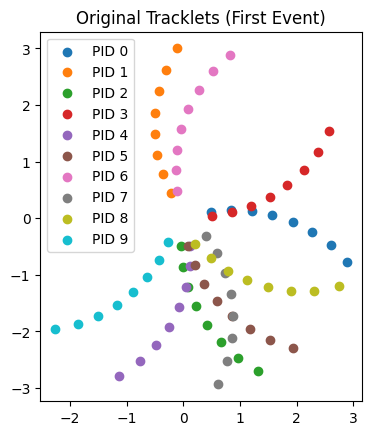

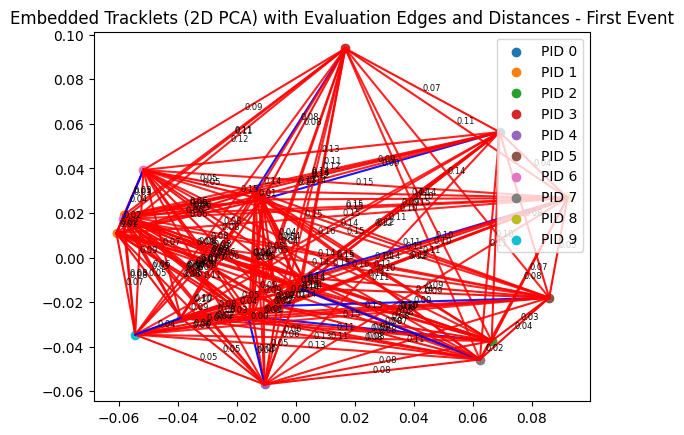

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.0526
  Mean True Distance: 0.0545
  Mean Fake Distance: 0.0759
Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:07<00:07,  0.14it/s]Max edge index: 19
Distances shape: torch.Size([19000])
Sample distances: tensor([0.0219, 0.0427, 0.1123, 0.0405, 0.0641], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           Starting first training step...
Batch shapes: x=torch.Size([100, 20, 4, 2]), mask=torch.Size([100, 20, 4]), pids=torch.Size([100, 20]), edge_index=torch.Size([100, 190, 2]), edge_mask=torch.Size([100, 190]), y=torch.Size([100, 190])
Flattened x shape: torch.Size([100, 20, 8])
Embedded tracklets shape: torch.Size([100, 20, 8])
Max edge index: 19
Embeddings 0 shape: torch.Size([19000, 8])
Embeddings 1 shape: torch.Size([19000, 8])
Distances shape: torch.Size([19000])
Sample distances: tensor([0.0868, 0.0584, 0.0

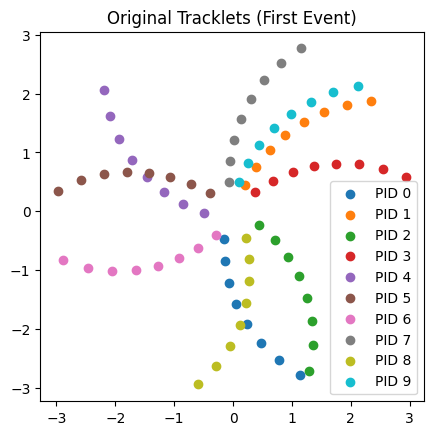

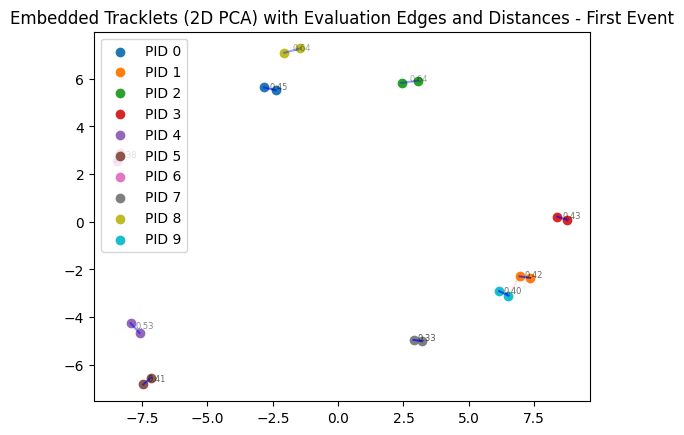

First Event Metrics:
  Efficiency: 0.9950
  Purity: 0.6741
  Mean True Distance: 0.3922
  Mean Fake Distance: 9.7429
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 1: 100%|██████████| 100/100 [00:14<00:00,  6.83it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


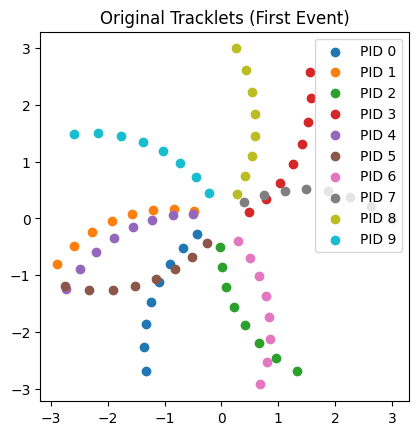

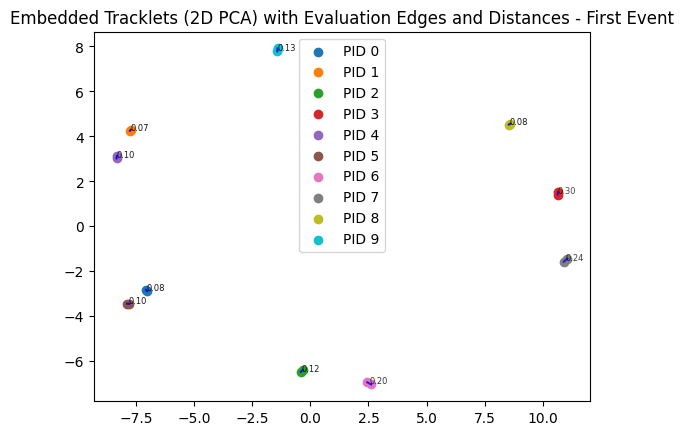

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.6798
  Mean True Distance: 0.1793
  Mean Fake Distance: 10.6186
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 2: 100%|██████████| 100/100 [00:14<00:00,  6.71it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


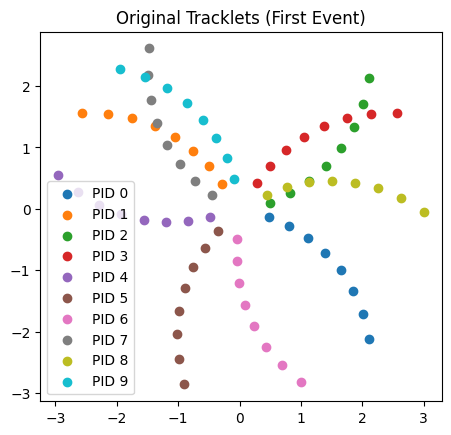

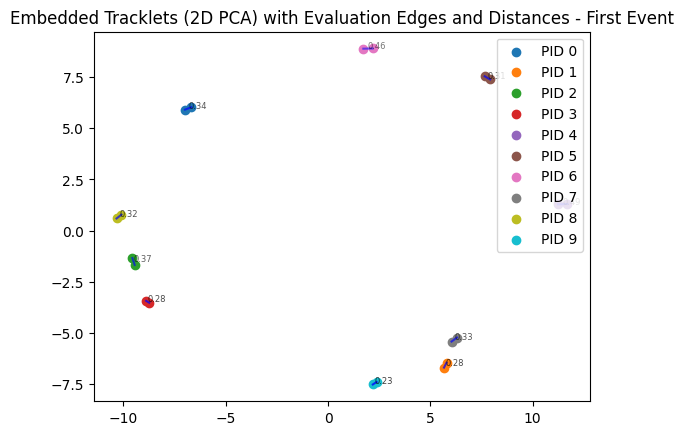

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.7358
  Mean True Distance: 0.3128
  Mean Fake Distance: 12.2044
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 3: 100%|██████████| 100/100 [00:14<00:00,  6.71it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


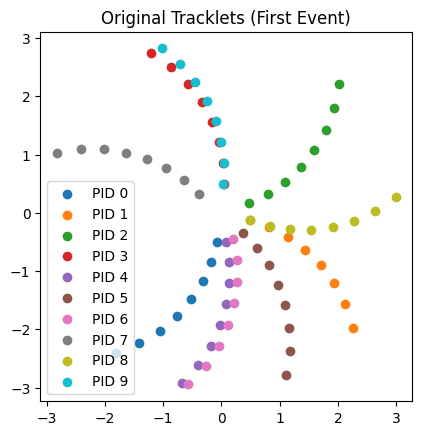

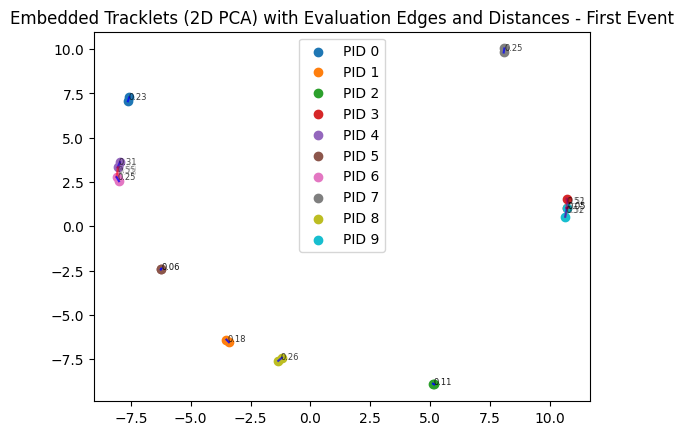

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.7225
  Mean True Distance: 0.2051
  Mean Fake Distance: 12.9980
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 4: 100%|██████████| 100/100 [00:14<00:00,  6.92it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


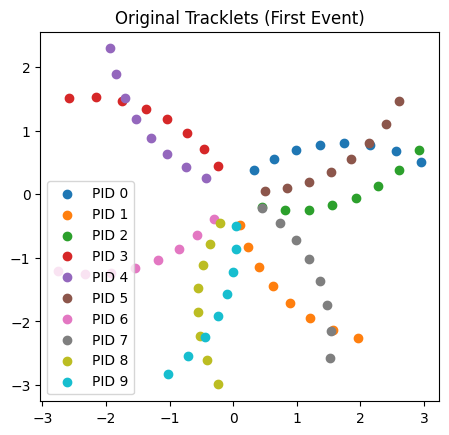

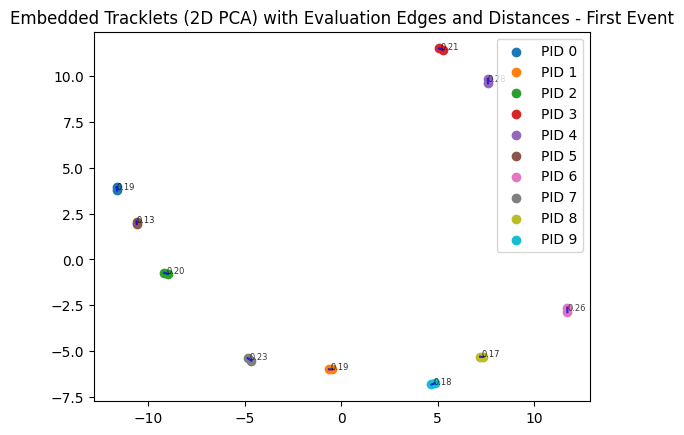

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.7639
  Mean True Distance: 0.1968
  Mean Fake Distance: 13.4944
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 5: 100%|██████████| 100/100 [00:14<00:00,  6.73it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


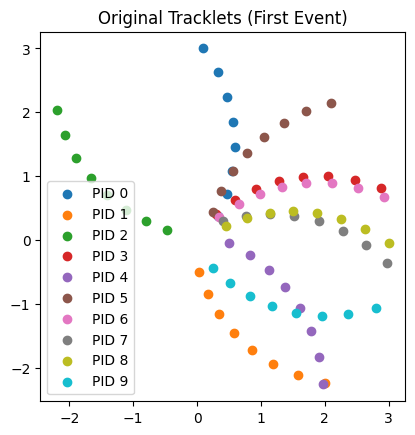

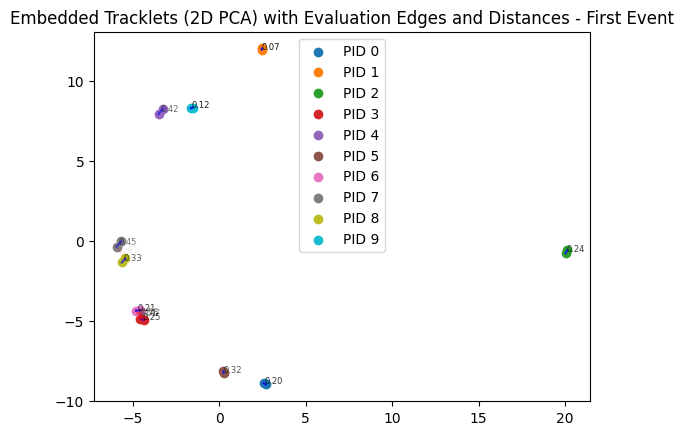

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.7788
  Mean True Distance: 0.2202
  Mean Fake Distance: 16.0278
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 6: 100%|██████████| 100/100 [00:15<00:00,  6.60it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


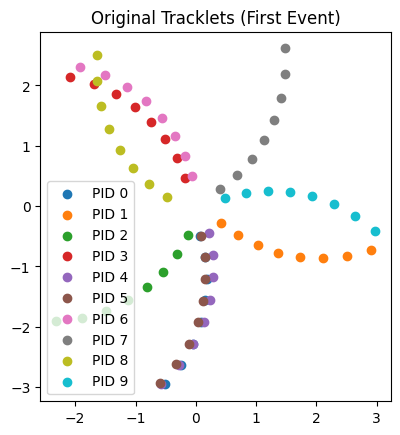

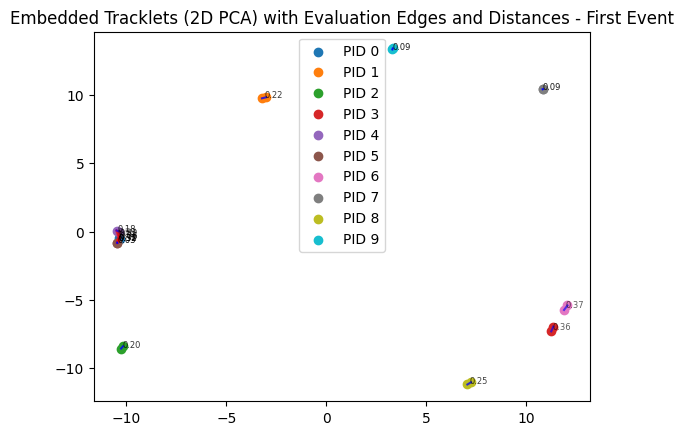

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.7496
  Mean True Distance: 0.1864
  Mean Fake Distance: 16.7784
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 7: 100%|██████████| 100/100 [00:14<00:00,  6.90it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


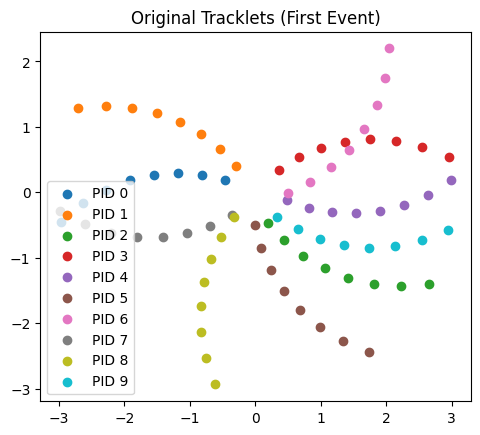

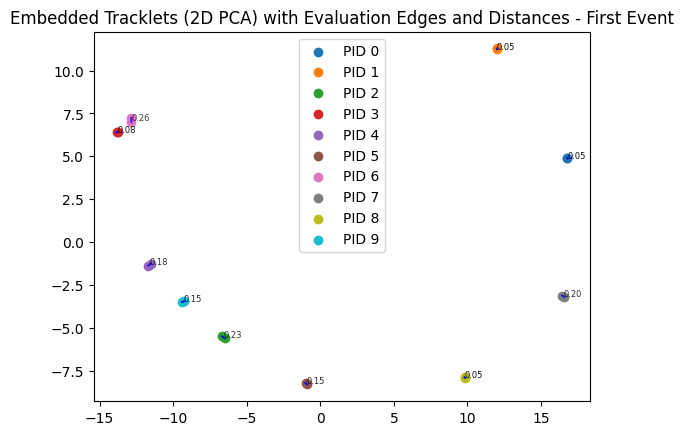

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.7874
  Mean True Distance: 0.1184
  Mean Fake Distance: 17.4850
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 8: 100%|██████████| 100/100 [00:14<00:00,  6.67it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


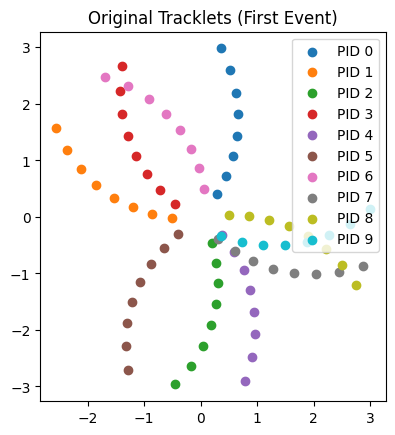

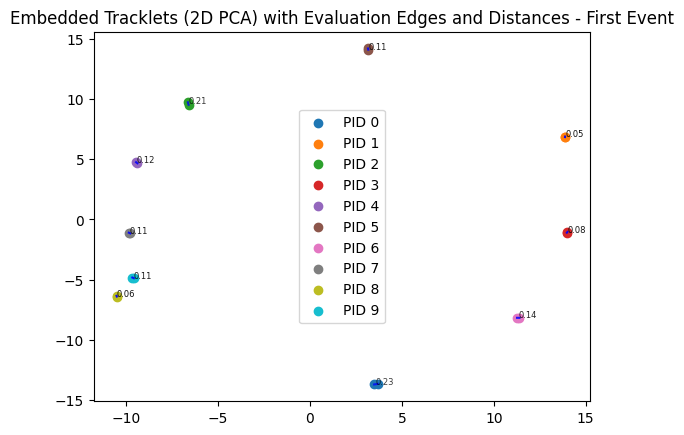

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8217
  Mean True Distance: 0.1446
  Mean Fake Distance: 17.4585
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 9: 100%|██████████| 100/100 [00:14<00:00,  6.74it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


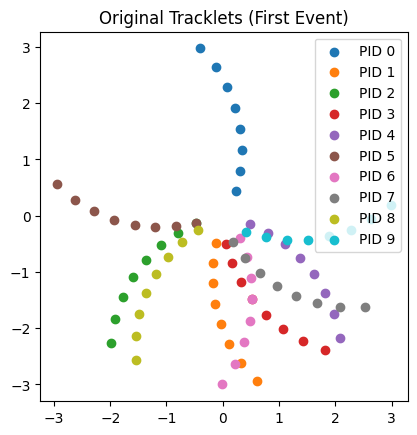

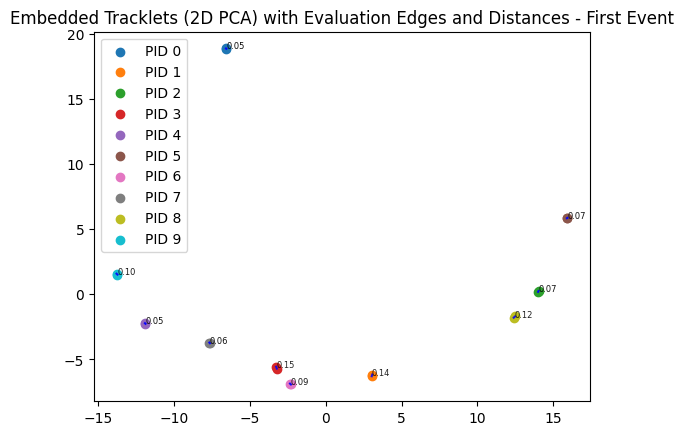

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.7981
  Mean True Distance: 0.1107
  Mean Fake Distance: 18.6069
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 10: 100%|██████████| 100/100 [00:15<00:00,  6.61it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


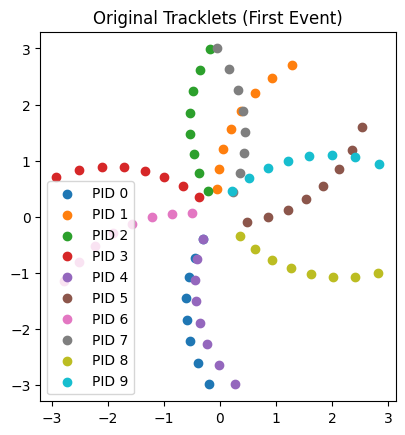

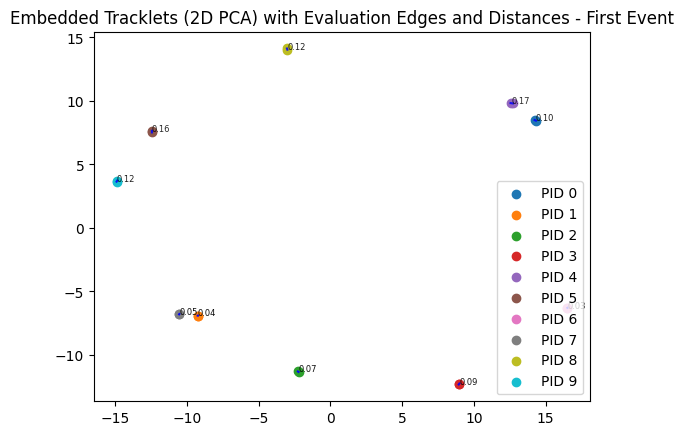

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8130
  Mean True Distance: 0.1057
  Mean Fake Distance: 19.0691
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 11: 100%|██████████| 100/100 [00:14<00:00,  6.87it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


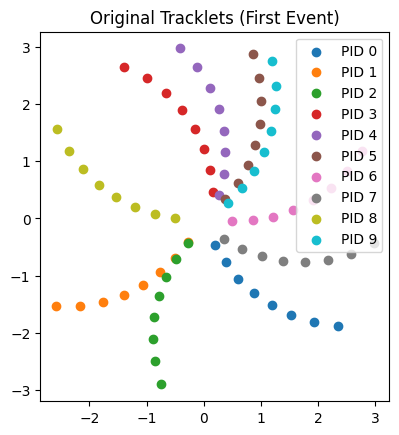

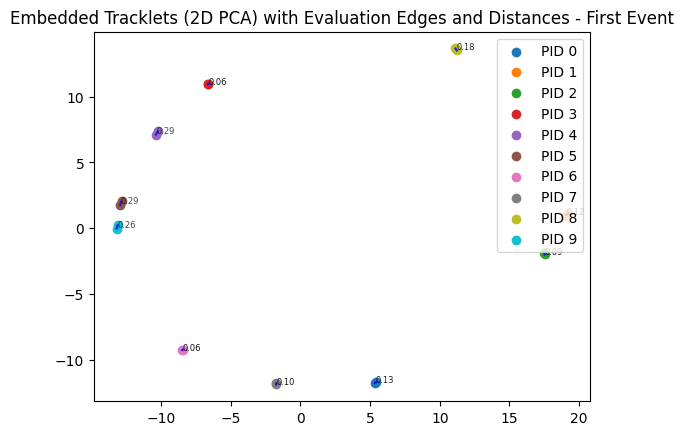

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8496
  Mean True Distance: 0.1424
  Mean Fake Distance: 18.9603
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 12: 100%|██████████| 100/100 [00:15<00:00,  6.59it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


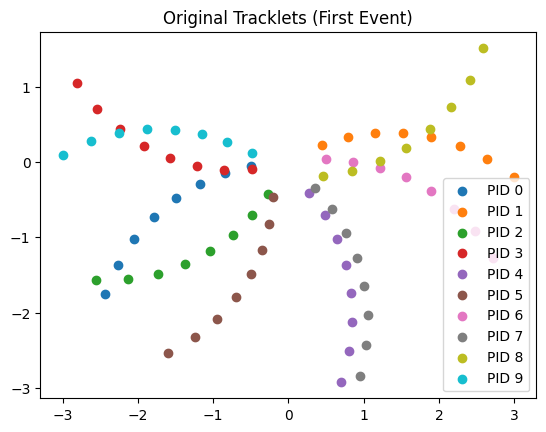

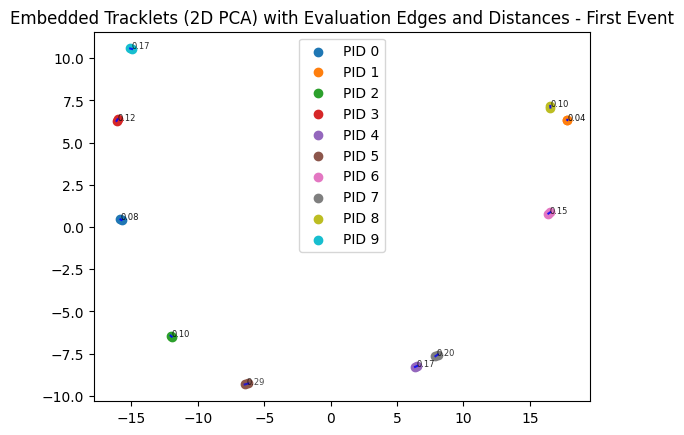

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8696
  Mean True Distance: 0.1004
  Mean Fake Distance: 20.2297
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 13: 100%|██████████| 100/100 [00:15<00:00,  6.59it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


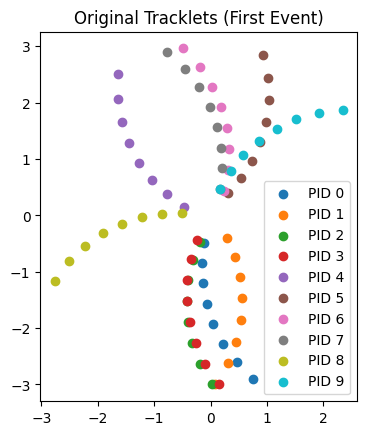

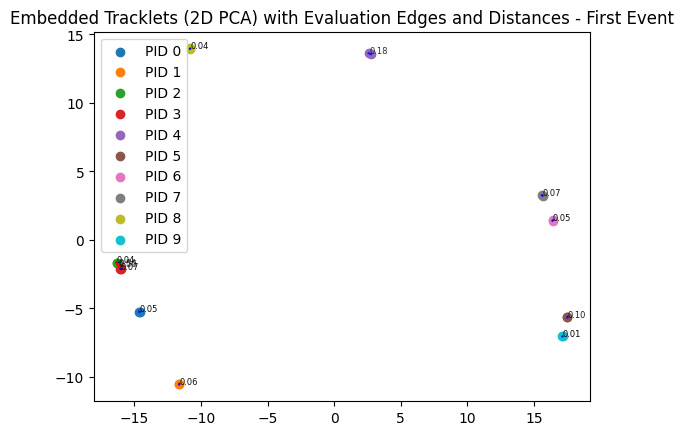

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8726
  Mean True Distance: 0.0888
  Mean Fake Distance: 21.4608
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 14: 100%|██████████| 100/100 [00:15<00:00,  6.62it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


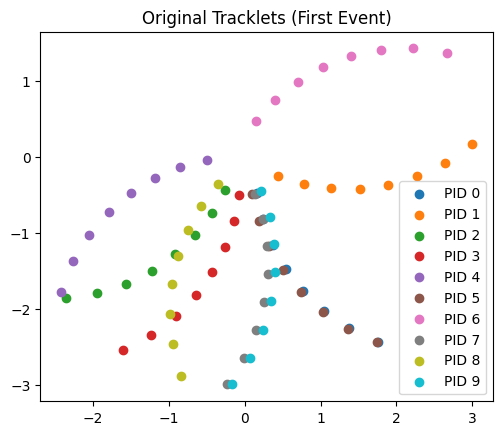

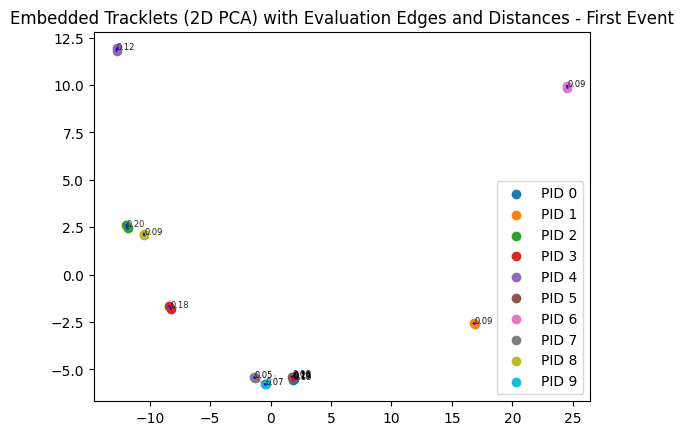

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8532
  Mean True Distance: 0.1237
  Mean Fake Distance: 21.3927
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 15: 100%|██████████| 100/100 [00:14<00:00,  6.74it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


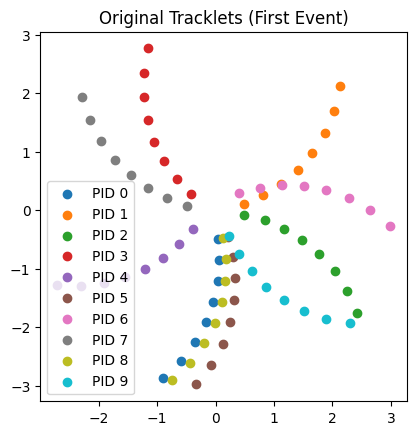

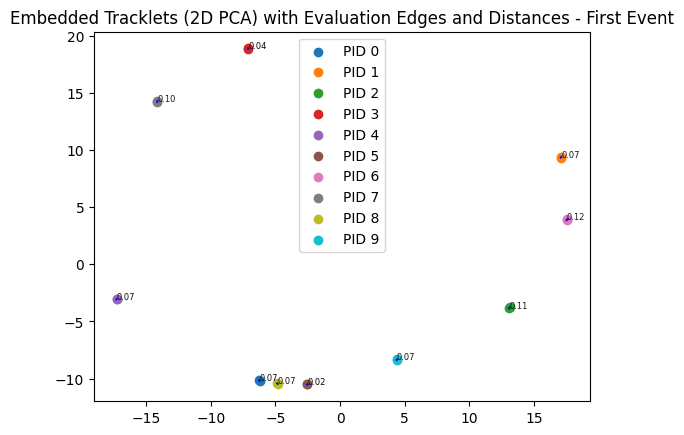

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8511
  Mean True Distance: 0.0845
  Mean Fake Distance: 21.4916
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 16: 100%|██████████| 100/100 [00:14<00:00,  6.77it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


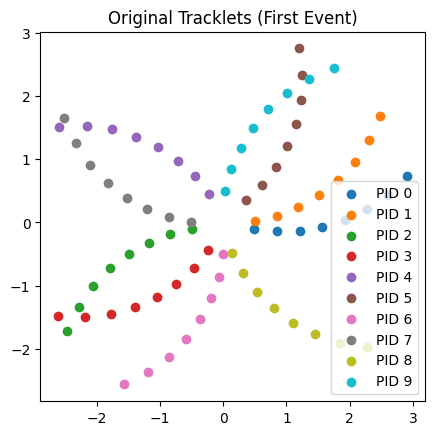

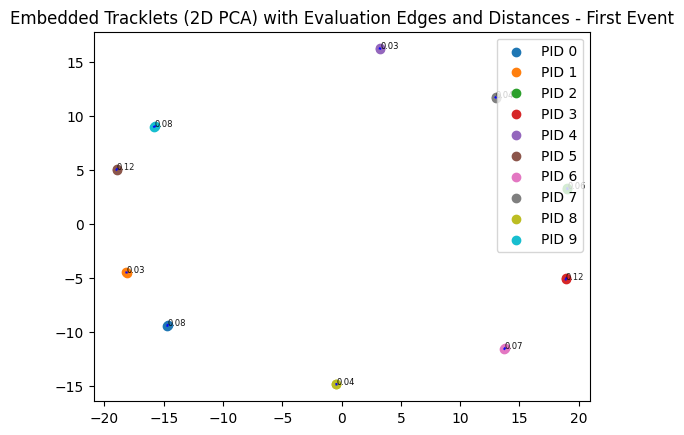

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8432
  Mean True Distance: 0.0673
  Mean Fake Distance: 22.3331
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 17: 100%|██████████| 100/100 [00:14<00:00,  6.75it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


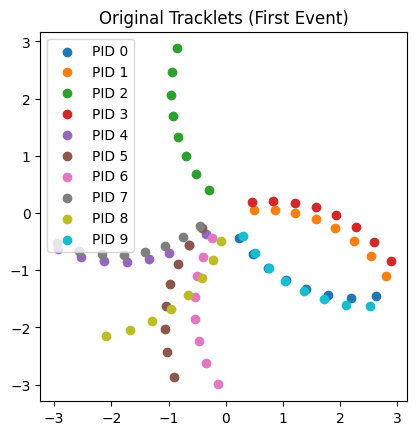

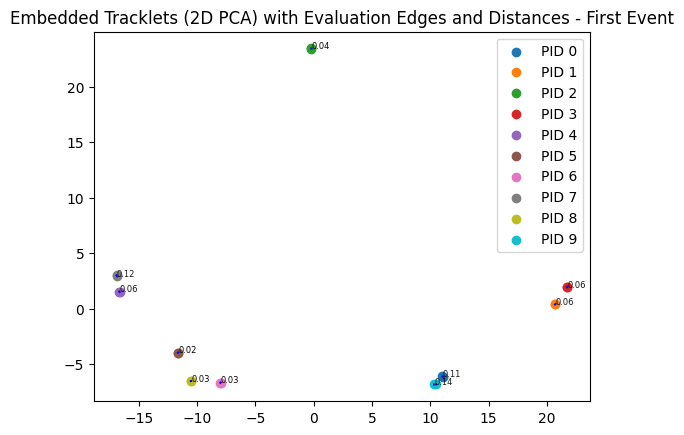

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8410
  Mean True Distance: 0.0760
  Mean Fake Distance: 23.6489
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 18: 100%|██████████| 100/100 [00:14<00:00,  6.75it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


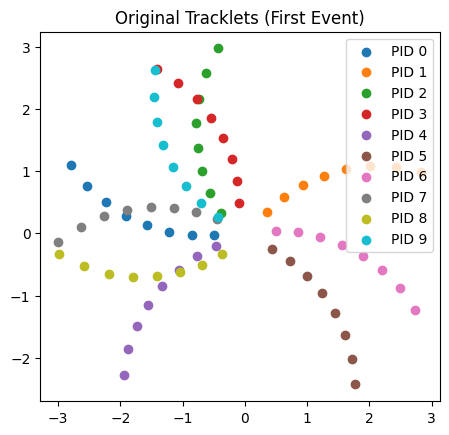

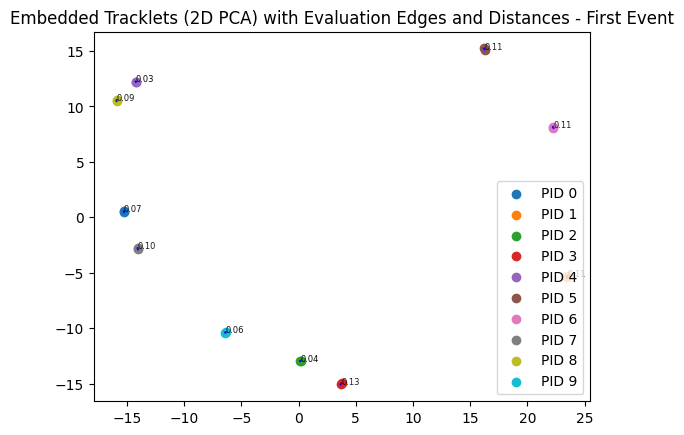

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8718
  Mean True Distance: 0.0684
  Mean Fake Distance: 23.6941
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 19: 100%|██████████| 100/100 [00:14<00:00,  6.82it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


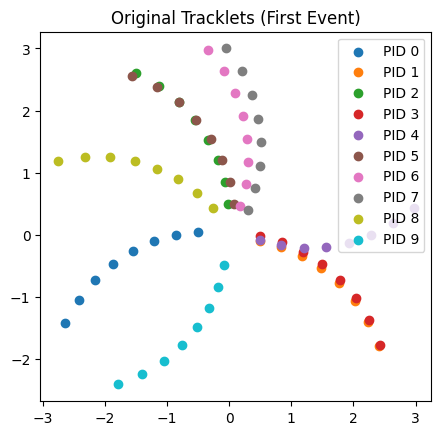

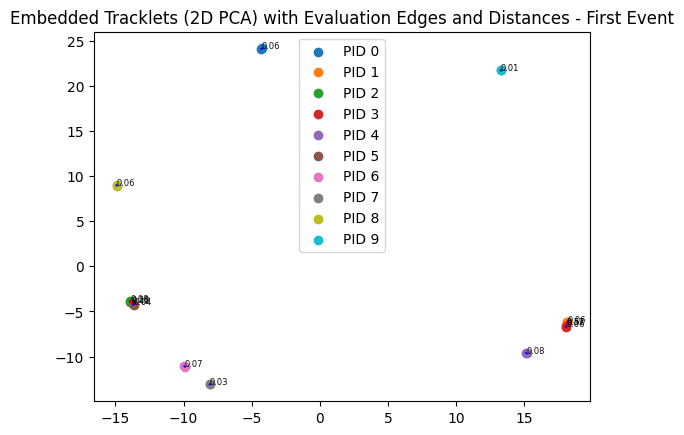

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8741
  Mean True Distance: 0.0713
  Mean Fake Distance: 25.0824
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 20: 100%|██████████| 100/100 [00:14<00:00,  6.73it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


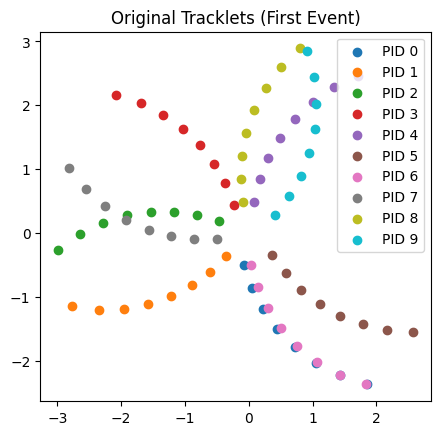

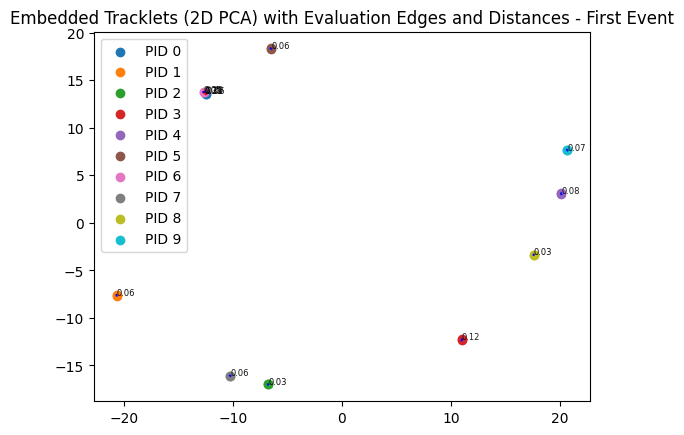

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.9116
  Mean True Distance: 0.0529
  Mean Fake Distance: 25.2039
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 21: 100%|██████████| 100/100 [00:14<00:00,  6.85it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


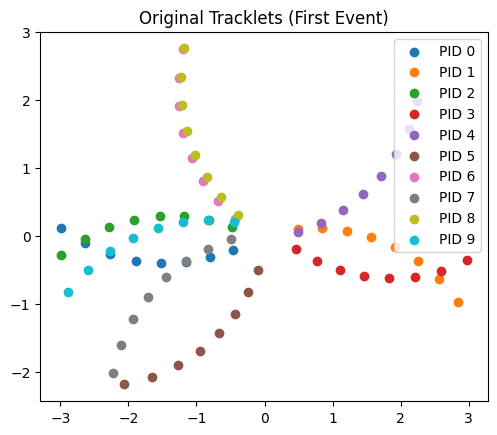

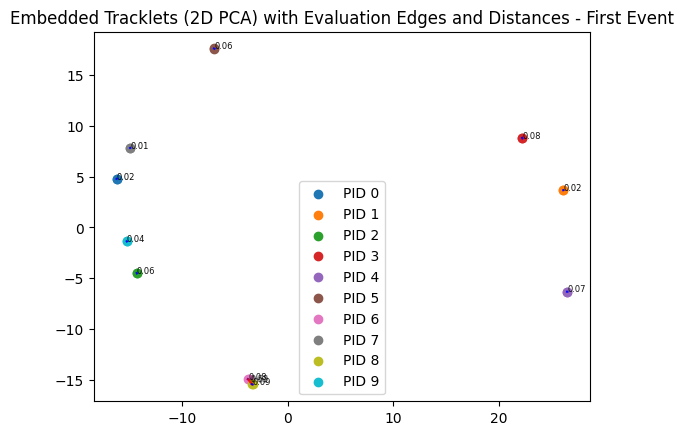

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8584
  Mean True Distance: 0.0592
  Mean Fake Distance: 25.8154
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 22: 100%|██████████| 100/100 [00:14<00:00,  6.69it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


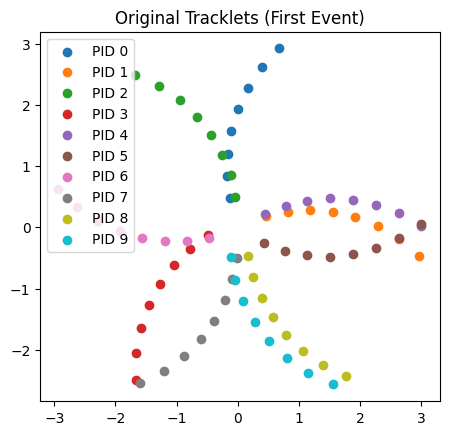

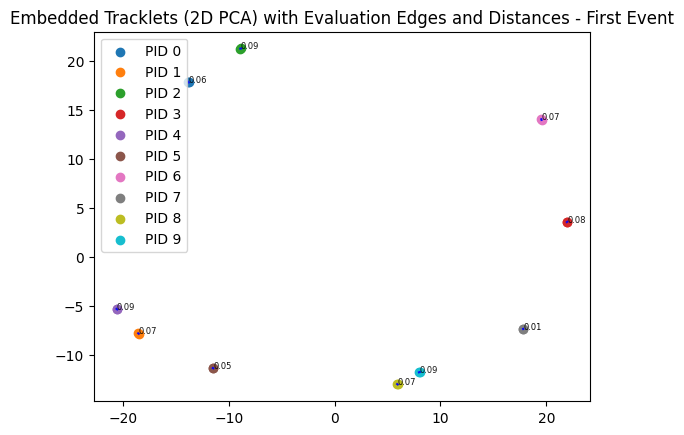

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8621
  Mean True Distance: 0.0637
  Mean Fake Distance: 26.3260
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 23: 100%|██████████| 100/100 [00:14<00:00,  6.78it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


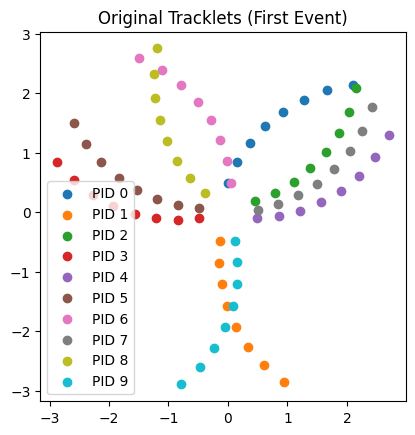

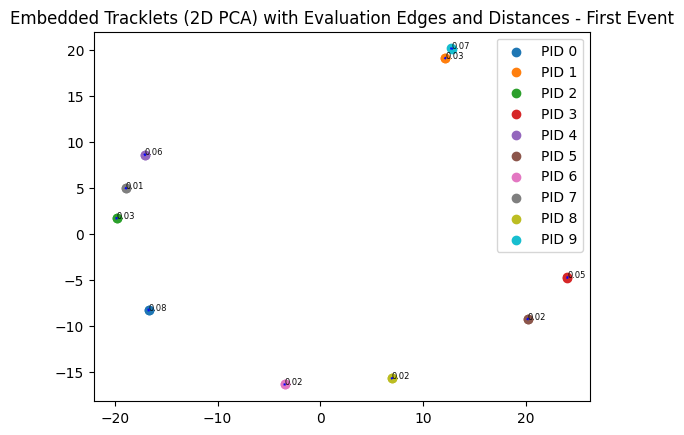

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8711
  Mean True Distance: 0.0512
  Mean Fake Distance: 26.6719
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 24: 100%|██████████| 100/100 [00:14<00:00,  6.88it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


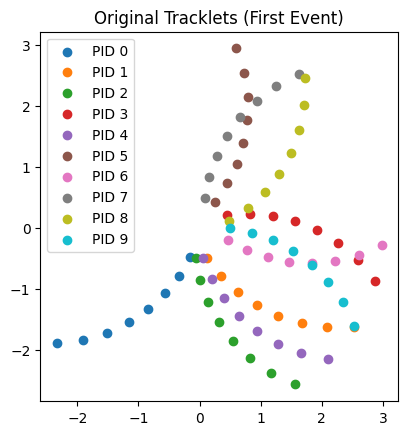

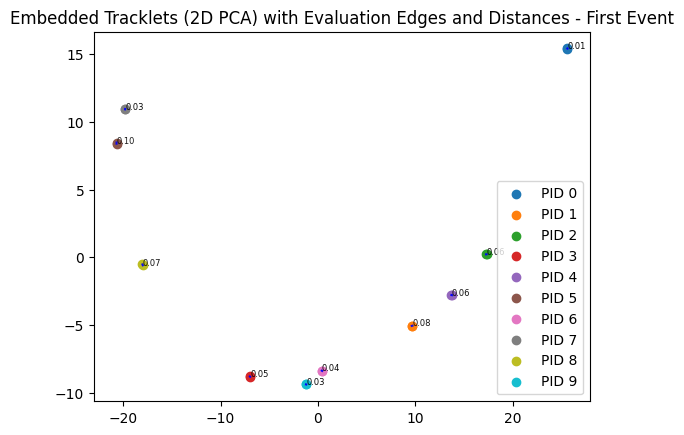

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8734
  Mean True Distance: 0.0455
  Mean Fake Distance: 27.2885
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 25: 100%|██████████| 100/100 [00:14<00:00,  6.73it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


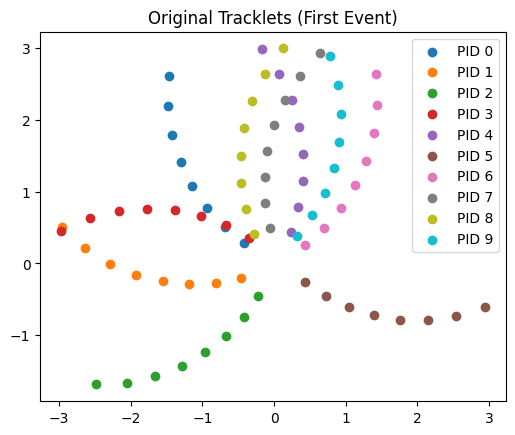

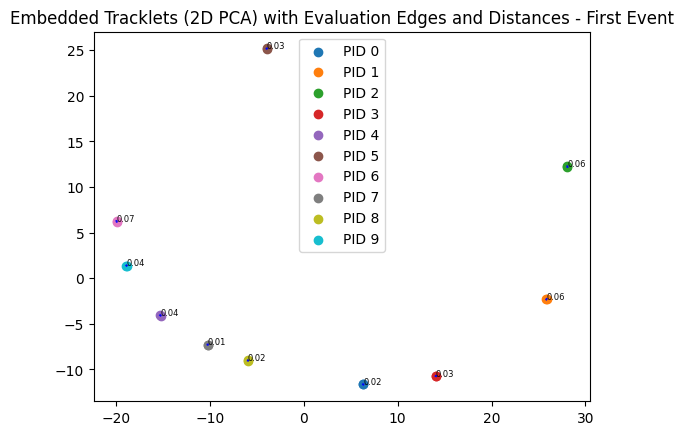

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8803
  Mean True Distance: 0.0450
  Mean Fake Distance: 27.3219
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 26: 100%|██████████| 100/100 [00:14<00:00,  6.81it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


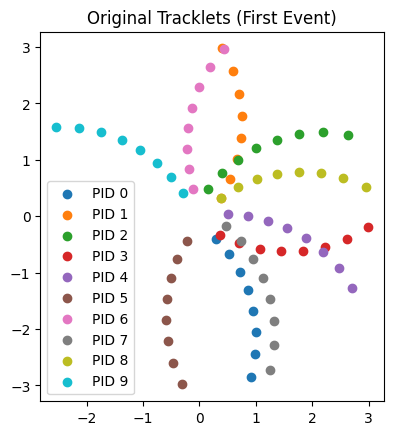

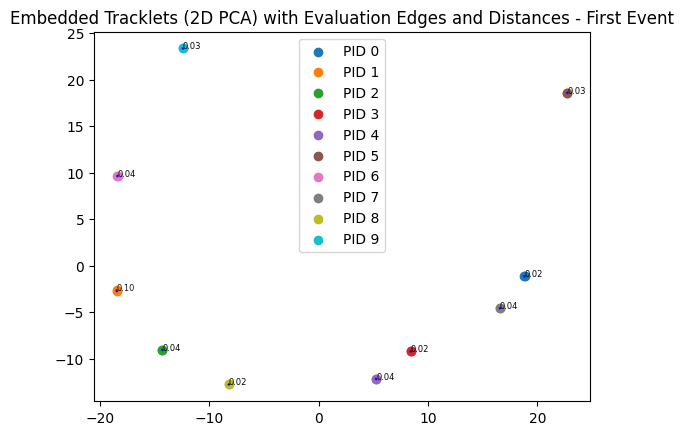

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8921
  Mean True Distance: 0.0445
  Mean Fake Distance: 27.9140
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 27: 100%|██████████| 100/100 [00:14<00:00,  6.78it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


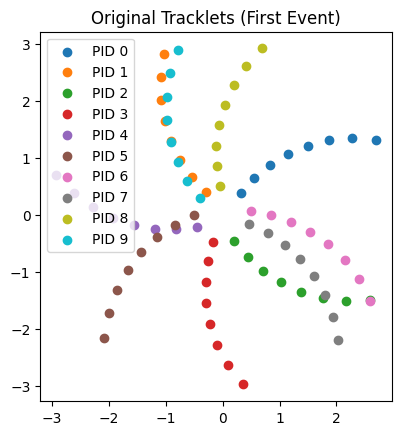

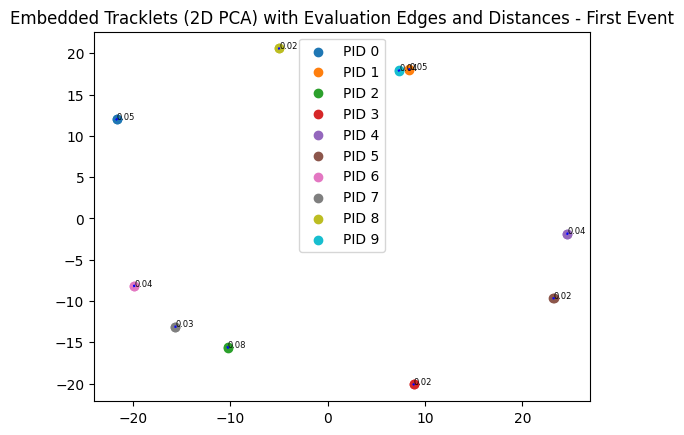

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8772
  Mean True Distance: 0.0437
  Mean Fake Distance: 28.7403
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 28: 100%|██████████| 100/100 [00:15<00:00,  6.64it/s, v_num=ctcc]

Exception ignored in: <function _releaseLock at 0x7fda39669fc0>
Traceback (most recent call last):
  File "/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


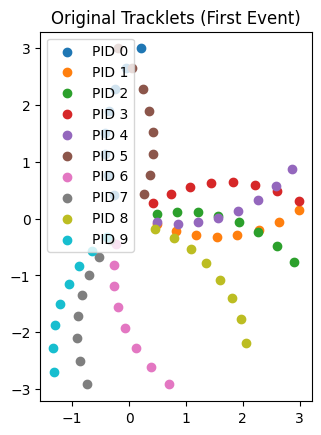

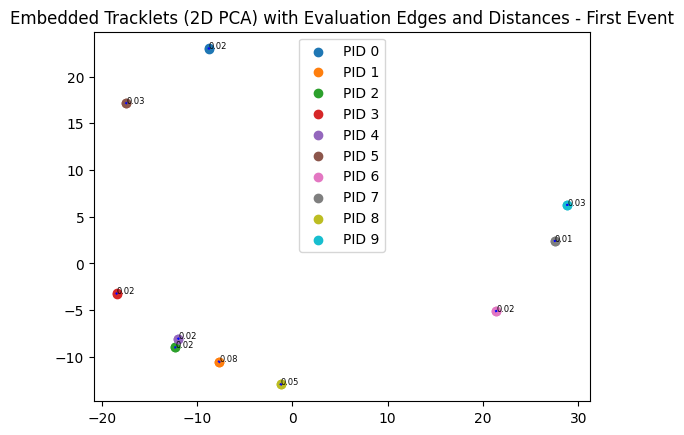

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8834
  Mean True Distance: 0.0421
  Mean Fake Distance: 28.9471
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 29: 100%|██████████| 100/100 [00:14<00:00,  6.73it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


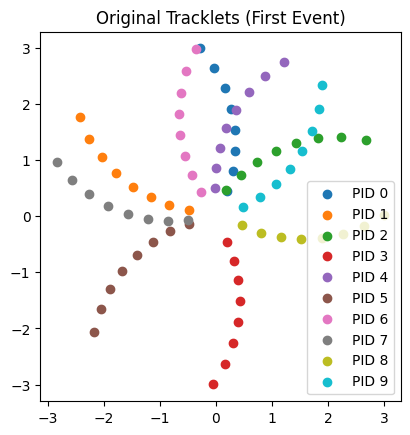

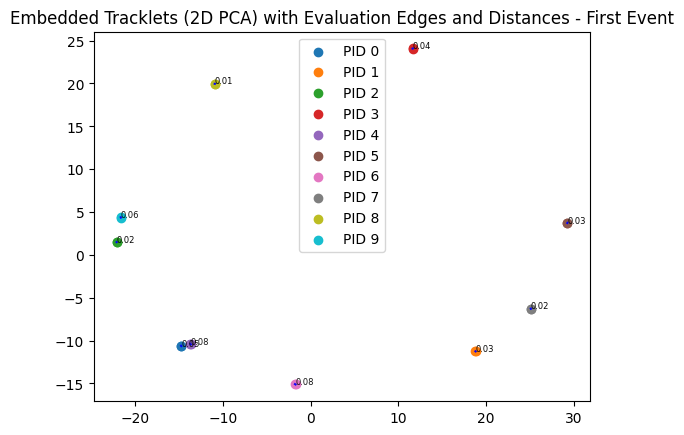

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8937
  Mean True Distance: 0.0420
  Mean Fake Distance: 29.4431
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 30: 100%|██████████| 100/100 [00:14<00:00,  6.71it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


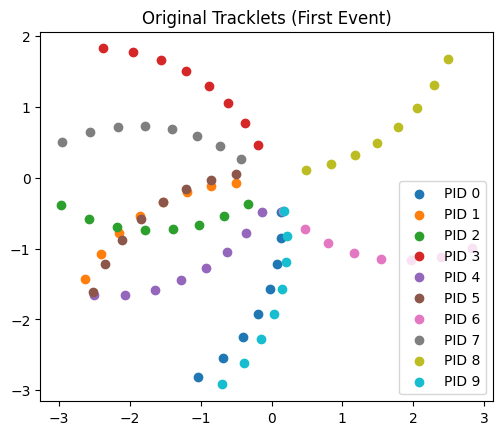

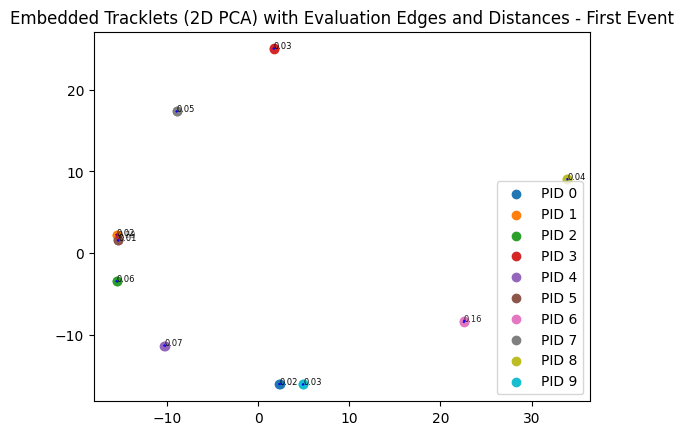

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8961
  Mean True Distance: 0.0402
  Mean Fake Distance: 29.5177
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 31: 100%|██████████| 100/100 [00:15<00:00,  6.63it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


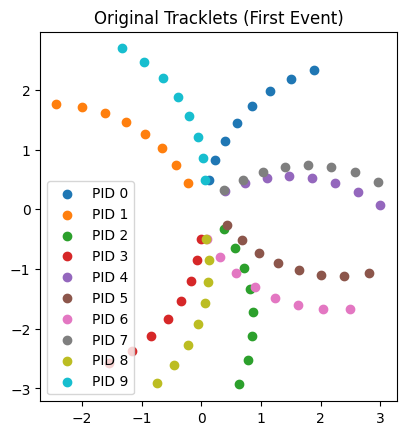

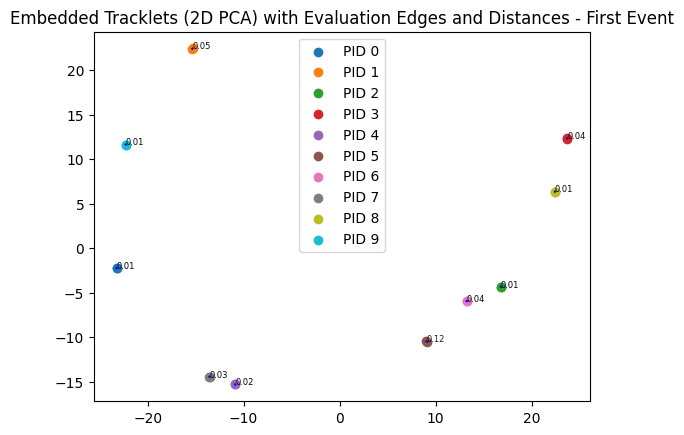

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8803
  Mean True Distance: 0.0377
  Mean Fake Distance: 29.7000
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 32: 100%|██████████| 100/100 [00:14<00:00,  6.73it/s, v_num=ctcc]truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')


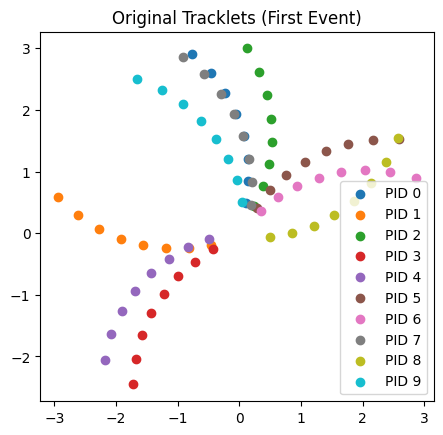

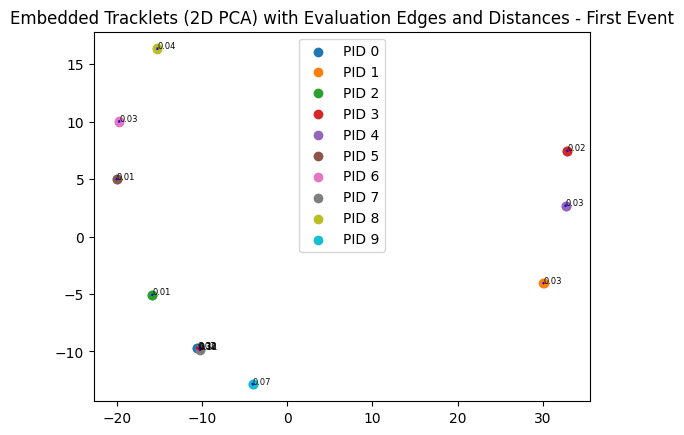

First Event Metrics:
  Efficiency: 1.0000
  Purity: 0.8621
  Mean True Distance: 0.0383
  Mean Fake Distance: 30.5274
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
truth_for_loss: tensor([ 1., -1., -1.,  ..., -1., -1.,  1.], device='cuda:0')
Epoch 33:  66%|██████▌   | 66/100 [00:10<00:05,  6.46it/s, v_num=ctcc]

/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [4]:
wandb_logger = WandbLogger(project="JEPA_toytrack_splittracks_contrastive_v2")
trainer = L.Trainer(
    max_epochs=50, 
    devices=1, 
    accelerator="gpu", 
    limit_train_batches = config["train_batches"], 
    limit_val_batches = config["val_batches"],
    logger = wandb_logger,
)
trainer.fit(model=model)

## Visualize Source-Target Encodings

In [24]:
model = model.to("cpu")

In [25]:
# Loop through a 10 batches, append the source, target encodings
source_encodings = []
target_encodings = []

batches = 0

with torch.no_grad():
    for batch in model.train_dataloader():
        results = model.shared_evaluation(batch, 0)
        source_encodings.append(results["context"].detach())
        target_encodings.append(results["target"].detach())
        batches += 1
        if batches > 10:
            break


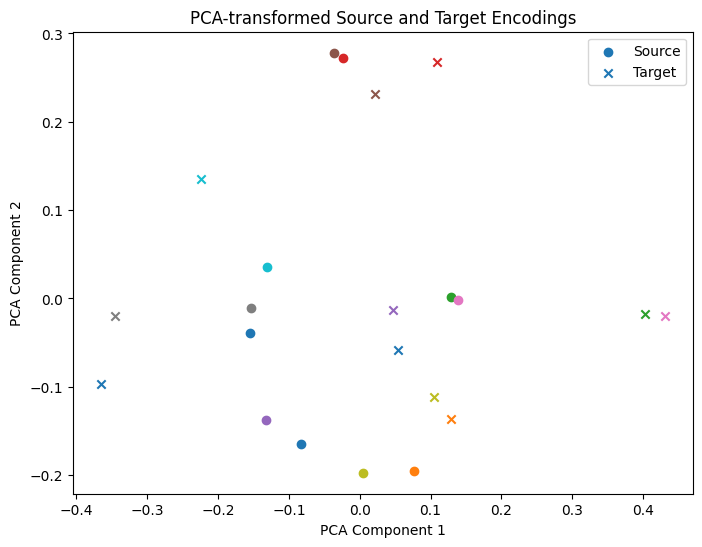

In [26]:
# Now PCA down the source and target encodings

# Sketch of changes:
# - Concatenate the source and target encodings into a single matrix
# - Perform PCA on the concatenated matrix to reduce dimensionality 
# - Extract the transformed source and target encodings from the PCA result
# - Visualize the PCA-transformed encodings in a scatter plot with matching colors for source and target encodings
# - Use 'o' for source encodings and 'x' for target encodings

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Concatenate source and target encodings
source_encodings_cat = np.concatenate([x.numpy() for x in source_encodings], axis=0)
target_encodings_cat = np.concatenate([x.numpy() for x in target_encodings], axis=0)
encodings_matrix = np.concatenate([source_encodings_cat, target_encodings_cat], axis=0)

# Perform PCA
pca = PCA(n_components=2)
pca_encodings = pca.fit_transform(encodings_matrix)

# Extract transformed source and target encodings
pca_source_encodings = pca_encodings[:len(source_encodings_cat)]
pca_target_encodings = pca_encodings[len(source_encodings_cat):]

# Visualize PCA-transformed encodings
plt.figure(figsize=(8, 6))
for i in range(len(pca_source_encodings)):
    plt.scatter(pca_source_encodings[i, 0], pca_source_encodings[i, 1], color=f'C{i}', marker='o', label='Source' if i == 0 else "")
    plt.scatter(pca_target_encodings[i, 0], pca_target_encodings[i, 1], color=f'C{i}', marker='x', label='Target' if i == 0 else "")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('PCA-transformed Source and Target Encodings')
plt.show()

In [27]:
# Loop through a 10 batches, append the source, target encodings
prediction_encodings = []
target_encodings = []

batches = 0

with torch.no_grad():
    for batch in model.train_dataloader():
        results = model.shared_evaluation(batch, 0)
        prediction_encodings.append(results["prediction"].detach())
        target_encodings.append(results["target"].detach())
        batches += 1
        if batches > 10:
            break


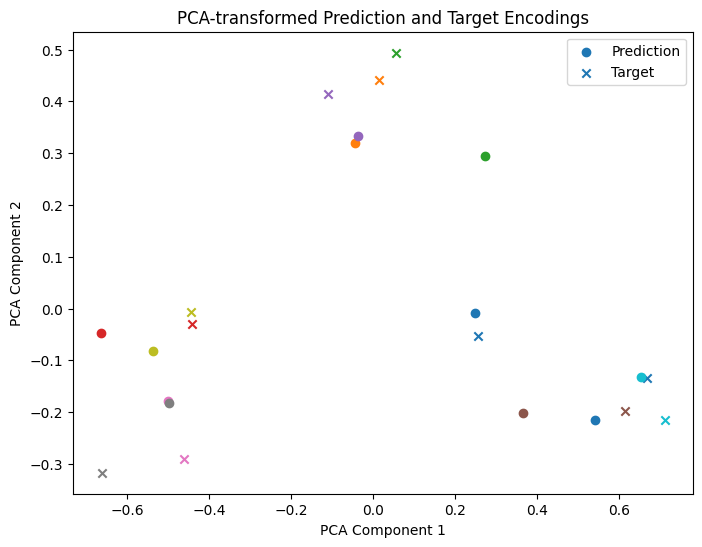

In [28]:
# Now PCA down the source and target encodings

# Sketch of changes:
# - Concatenate the source and target encodings into a single matrix
# - Perform PCA on the concatenated matrix to reduce dimensionality 
# - Extract the transformed source and target encodings from the PCA result
# - Visualize the PCA-transformed encodings in a scatter plot with matching colors for source and target encodings
# - Use 'o' for source encodings and 'x' for target encodings

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Concatenate source and target encodings
prediction_encodings_cat = np.concatenate([x.numpy() for x in prediction_encodings], axis=0)
target_encodings_cat = np.concatenate([x.numpy() for x in target_encodings], axis=0)
encodings_matrix = np.concatenate([prediction_encodings_cat, target_encodings_cat], axis=0)

# Perform PCA
pca = PCA(n_components=2)
pca_encodings = pca.fit_transform(encodings_matrix)

# Extract transformed source and target encodings
pca_prediction_encodings = pca_encodings[:len(prediction_encodings_cat)]
pca_target_encodings = pca_encodings[len(prediction_encodings_cat):]

# Visualize PCA-transformed encodings
plt.figure(figsize=(8, 6))
for i in range(len(pca_prediction_encodings)):
    plt.scatter(pca_prediction_encodings[i, 0], pca_prediction_encodings[i, 1], color=f'C{i}', marker='o', label='Prediction' if i == 0 else "")
    plt.scatter(pca_target_encodings[i, 0], pca_target_encodings[i, 1], color=f'C{i}', marker='x', label='Target' if i == 0 else "")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('PCA-transformed Prediction and Target Encodings')
plt.show()